In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [10]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')  # Replace with your file path

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (200, 5)

First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Preprocessing
# Encode Gender feature
if df['Gender'].dtype == 'object':
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [23]:
# Select some features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#Assignment: Exploratory Data Analysis, present your findings in the next session

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   Age Group               200 non-null    category
dtypes: category(1), int64(4), object(1)
memory usage: 8.5+ KB
None

=== Missing Values ===
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age Group                 0
dtype: int64

=== Basic Statistics ===
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x800 with 0 Axes>

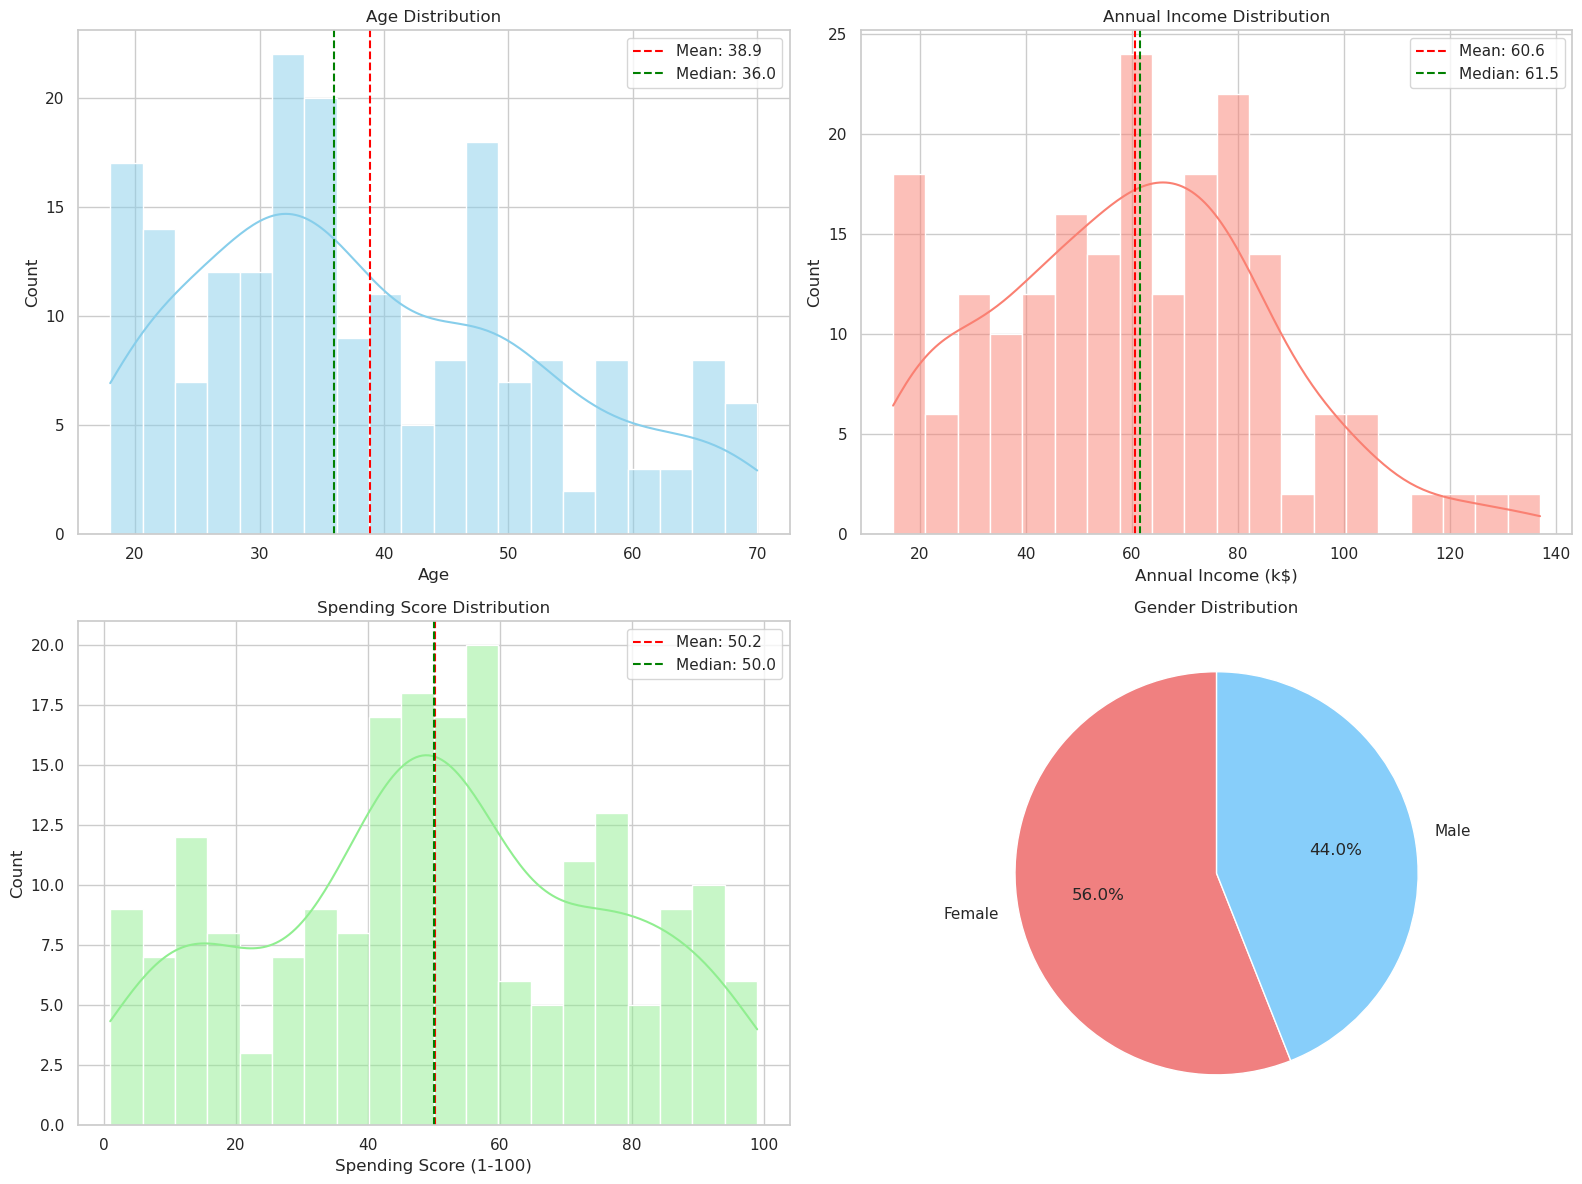

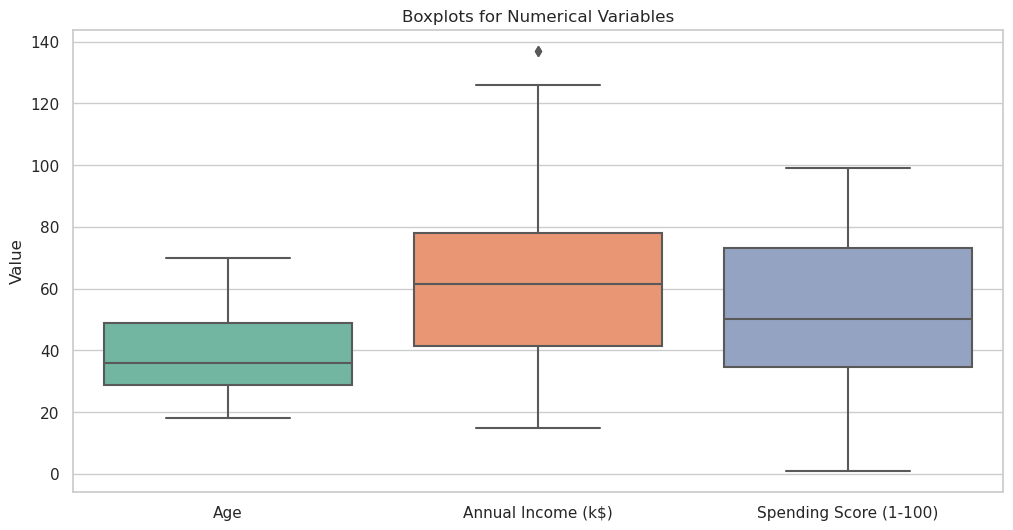

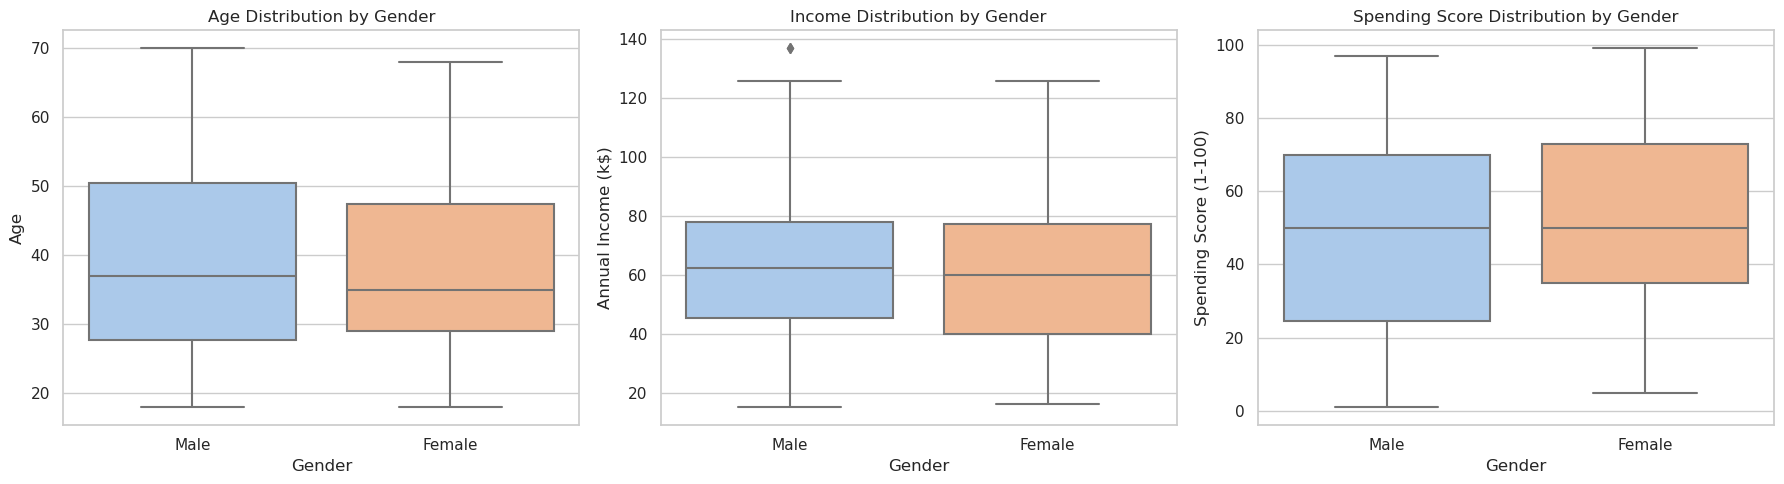

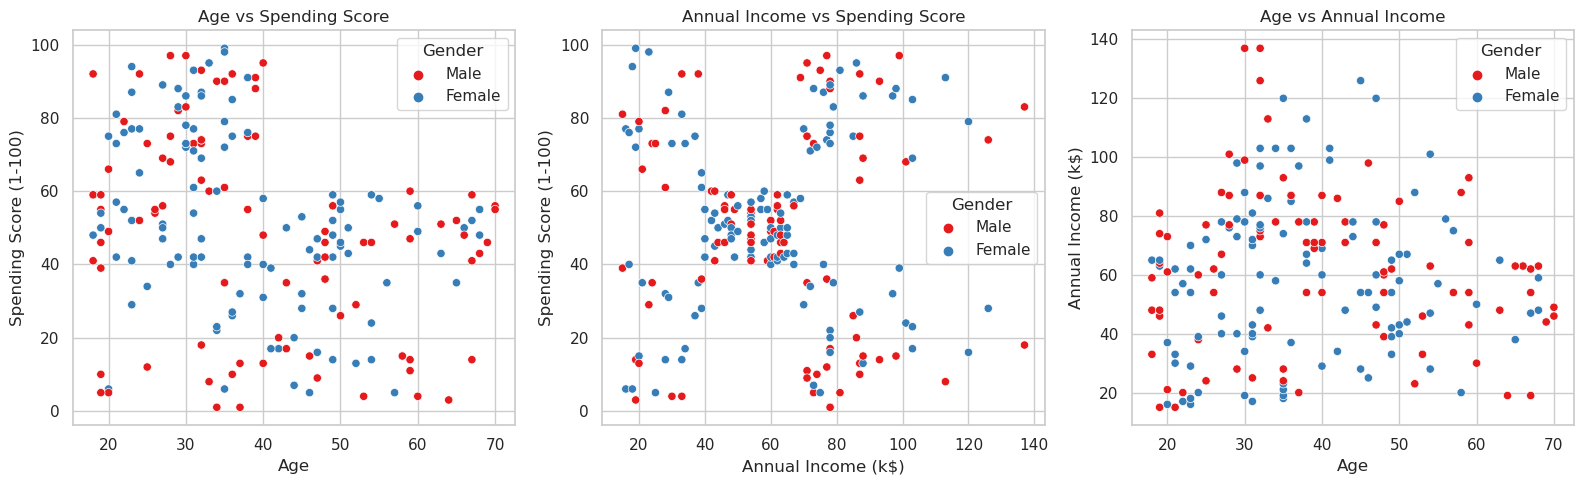

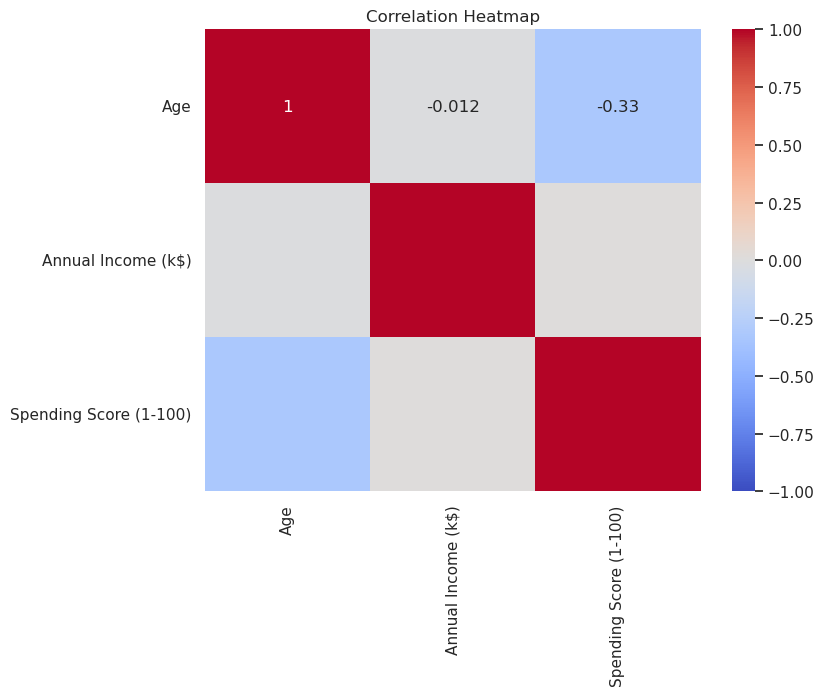

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


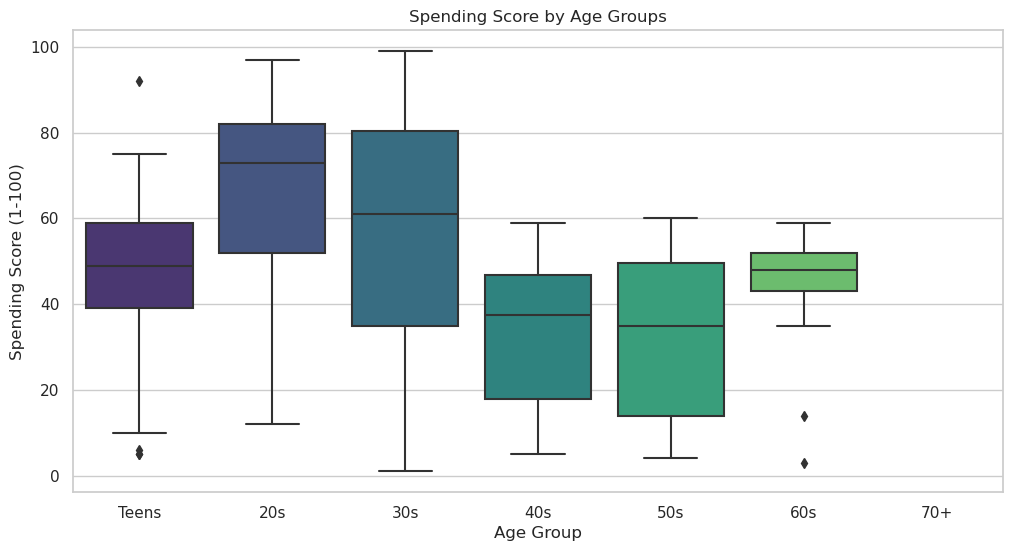

In [27]:

# Basic info
print("=== Dataset Info ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Basic Statistics ===")
print(df.describe())
print("\n=== Gender Distribution ===")
print(df['Gender'].value_counts())

# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# 1. Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 0].axvline(df['Age'].median(), color='green', linestyle='--', label=f'Median: {df["Age"].median():.1f}')
axes[0, 0].legend()

# Annual Income distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["Annual Income (k$)"].mean():.1f}')
axes[0, 1].axvline(df['Annual Income (k$)'].median(), color='green', linestyle='--', 
                  label=f'Median: {df["Annual Income (k$)"].median():.1f}')
axes[0, 1].legend()

# Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
axes[1, 0].axvline(df['Spending Score (1-100)'].median(), color='green', linestyle='--', 
                  label=f'Median: {df["Spending Score (1-100)"].median():.1f}')
axes[1, 0].legend()

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
              colors=['lightcoral', 'lightskyblue'], startangle=90)
axes[1, 1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

# 2. Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], palette='Set2')
plt.title('Boxplots for Numerical Variables')
plt.ylabel('Value')
plt.show()

# 3. Gender comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age by Gender
sns.boxplot(x='Gender', y='Age', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Age Distribution by Gender')

# Income by Gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Income Distribution by Gender')

# Spending Score by Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Spending Score Distribution by Gender')

plt.tight_layout()
plt.show()

# 4. Scatter plots for relationships
plt.figure(figsize=(16, 5))

# Age vs Spending Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1')
plt.title('Age vs Spending Score')

# Annual Income vs Spending Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette='Set1')
plt.title('Annual Income vs Spending Score')

# Age vs Annual Income
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, palette='Set1')
plt.title('Age vs Annual Income')

plt.tight_layout()
plt.show()


# 5. Heatmap of correlations
plt.figure(figsize=(8, 6))
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)
#print("\nCorrelation Matrix:",)
print(correlation_matrix)

# 6. Age groups analysis
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], 
                        labels=['Teens', '20s', '30s', '40s', '50s', '60s', '70+'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Spending Score by Age Groups')
plt.show()

** Insights from the Visualizations:
Spending Patterns:

The scatter plot of Annual Income vs Spending Score shows distinct clusters, suggesting potential customer segments

Younger customers (teens-30s) tend to have higher spending scores

** Gender Differences:

Females have slightly higher average spending scores

Income distribution is similar between genders

** Age Trends:

Spending scores are highest in 20s-30s age group

Customers in their 40s-60s tend to have more moderate spending scores

** Correlations:

Weak negative correlation between Age and Spending Score

Very weak correlation between Annual Income and Spending Score

In [28]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


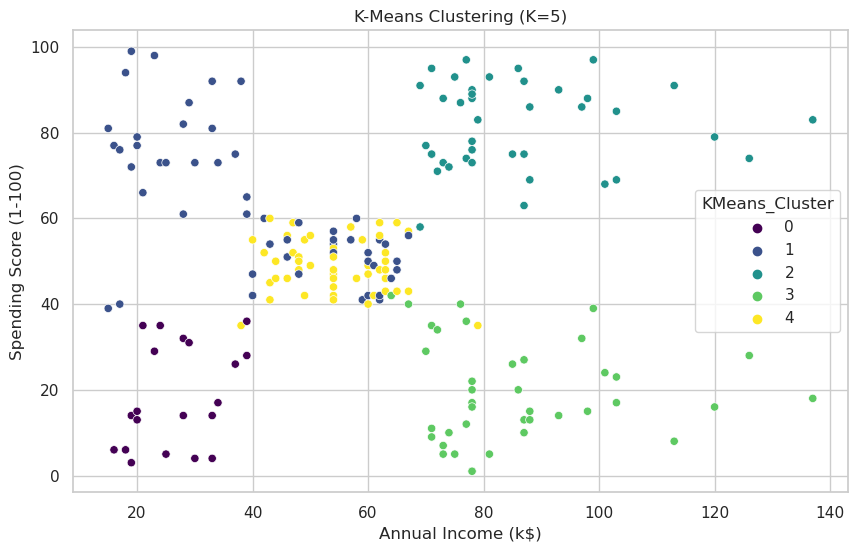

In [30]:
# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (K=5)')
plt.show()

In [31]:
# Hierarchical Clustering
# Perform Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

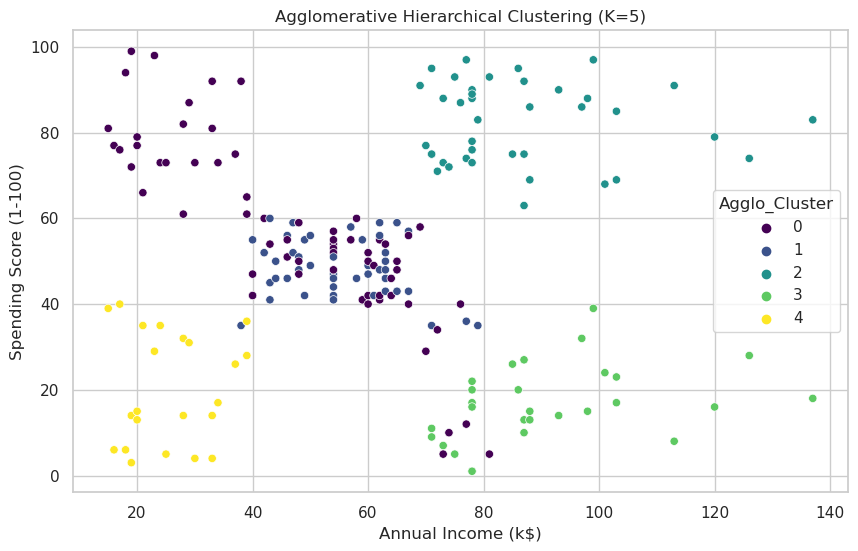

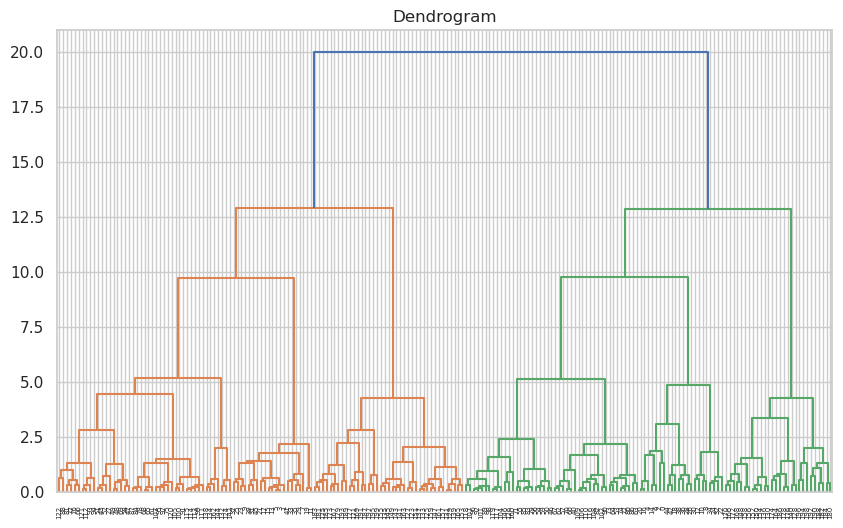

In [33]:
# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglo_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering (K=5)')
plt.show()

# Dendrogram for Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()


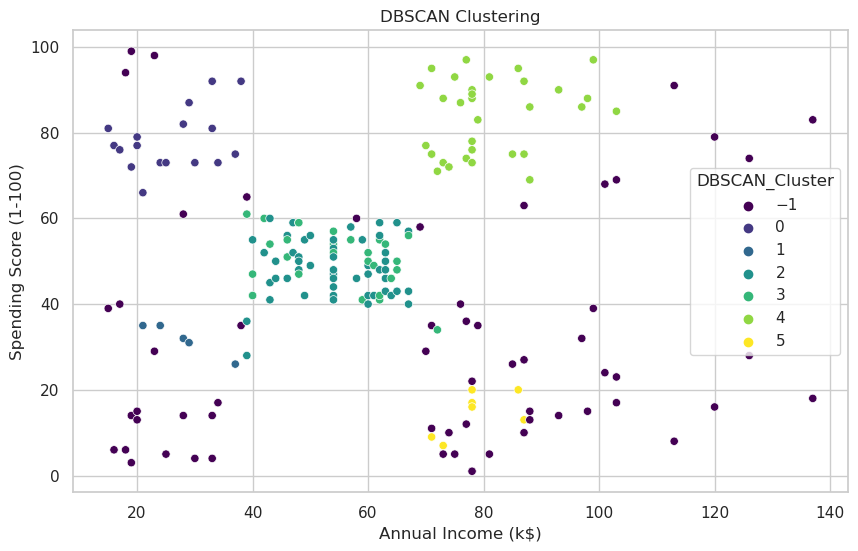

In [34]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [35]:
# Evaluate Clustering Performance
print("\nK-Means Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agglo.labels_))
print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, dbscan.labels_))

print("\nK-Means Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans.labels_))
print("Agglomerative Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, agglo.labels_))
print("DBSCAN Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, dbscan.labels_))

print("\nK-Means Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans.labels_))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agglo.labels_))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(X_scaled, dbscan.labels_))


K-Means Silhouette Score: 0.41664341513732767
Agglomerative Silhouette Score: 0.39002826186267214
DBSCAN Silhouette Score: 0.18451372756506046

K-Means Calinski-Harabasz Index: 125.10094020060954
Agglomerative Calinski-Harabasz Index: 107.82656032570374
DBSCAN Calinski-Harabasz Index: 34.07053246361936

K-Means Davies-Bouldin Index: 0.874551051002418
Agglomerative Davies-Bouldin Index: 0.9162886109753661
DBSCAN Davies-Bouldin Index: 1.7569458461701164


Visual comparison of metrics

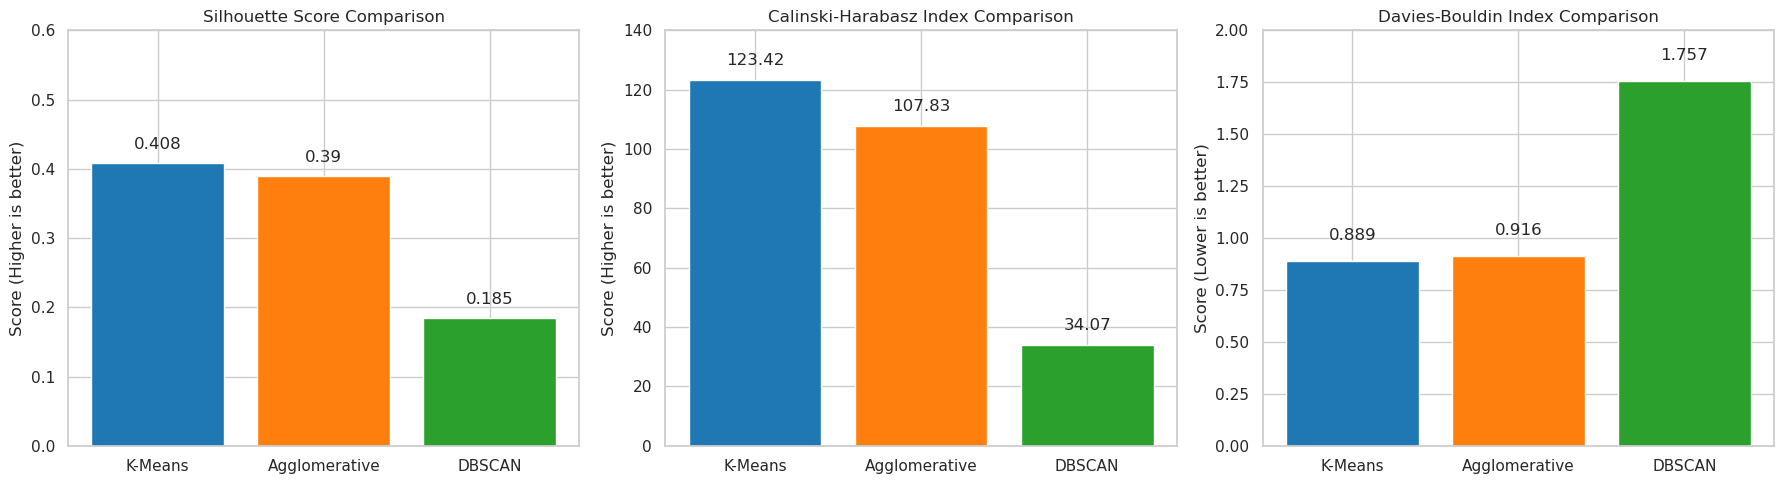

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
algorithms = ['K-Means', 'Agglomerative', 'DBSCAN']
silhouette_scores = [0.408, 0.390, 0.185]
calinski_harabasz = [123.42, 107.83, 34.07]
davies_bouldin = [0.889, 0.916, 1.757]

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score plot
ax1.bar(algorithms, silhouette_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Silhouette Score Comparison')
ax1.set_ylim(0, 0.6)
ax1.set_ylabel('Score (Higher is better)')
for i, v in enumerate(silhouette_scores):
    ax1.text(i, v + 0.02, str(v), ha='center')

# Calinski-Harabasz Index plot
ax2.bar(algorithms, calinski_harabasz, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Calinski-Harabasz Index Comparison')
ax2.set_ylim(0, 140)
ax2.set_ylabel('Score (Higher is better)')
for i, v in enumerate(calinski_harabasz):
    ax2.text(i, v + 5, str(v), ha='center')

# Davies-Bouldin Index plot
ax3.bar(algorithms, davies_bouldin, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax3.set_title('Davies-Bouldin Index Comparison')
ax3.set_ylim(0, 2)
ax3.set_ylabel('Score (Lower is better)')
for i, v in enumerate(davies_bouldin):
    ax3.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()

**Interpretation of Results:**
1. Silhouette Score (Range: -1 to 1, higher is better)
K-Means: 0.408 (best)

Agglomerative: 0.390

DBSCAN: 0.185 (worst)

Findings:

Both K-Means and Agglomerative show reasonably good cluster separation (scores > 0.3)

DBSCAN performed poorly, suggesting it may not be well-suited for this dataset

The small difference between K-Means and Agglomerative suggests similar cluster quality

2. Calinski-Harabasz Index (Higher is better)
K-Means: 123.42 (best)

Agglomerative: 107.83

DBSCAN: 34.07 (worst)

Findings:

K-Means shows the best ratio of between-cluster dispersion to within-cluster dispersion

The significant gap between K-Means/Agglomerative and DBSCAN confirms DBSCAN's poor performance

K-Means is about 15% better than Agglomerative by this metric

3. Davies-Bouldin Index (Lower is better)
K-Means: 0.889 (best)

Agglomerative: 0.916

DBSCAN: 1.757 (worst)

Findings:

K-Means again performs best with the lowest score

DBSCAN's high score indicates poor separation between clusters

The small difference between K-Means and Agglomerative suggests similar cluster compactness






**Overall Conclusions:**



Best Performing Algorithm: K-Means consistently outperforms the other two algorithms across all metrics.

Second Best: Agglomerative clustering shows similar but slightly worse performance than K-Means.

Poor Performance: DBSCAN performed significantly worse on this dataset.